<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#C85C8E;overflow:hidden;font-weight:500">Random Forest Classifier 💸 </div>





# **Table of Contents**

1.	[Introduction](#1)
2.	[Data Preprocessing](#2)
3.	[Model Training](#3)
4.	[Evaluation](#4)
5.	[K Fold Cross Validation](#5)


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Introduction
    </h1>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Importing Libraries
    </h3>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
df=pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
#Number of rows and columns
df.shape

(400, 3)

In [4]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


<div id='2'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Data Preprocessing
    </h1>
</div>

In [5]:
#Missing values
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Separating Target Variable
    </h3>
</div>

In [6]:
#Declaring Dependent and Independent variables
X = df.drop(['Purchased'],axis=1)
y = df['Purchased']

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Splitting Training and Testing Dataset
    </h3>
</div>

In [7]:
#Splitting x and y into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=4)

In [8]:
#checking the shape of X_train and X_test
X_train.shape, X_test.shape

((320, 2), (80, 2))

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Feature Scaling
    </h3>
</div>

In [9]:
from sklearn.preprocessing import RobustScaler
cols=X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()


,Age,EstimatedSalary
0,-0.0625,-0.454054
1,-0.1250,0.800000
2,0.1250,1.102703
3,-0.4375,-1.167568
4,-0.3125,0.324324


<div id='3'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Model Training
    </h1>
</div>

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8875


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">RF Classifier with n_estimators =100
    </h3>
</div>

In [12]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8875


<div id='4'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Evaluation
    </h1>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Accuracy
    </h3>
</div>

In [13]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Model Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Model Accuracy : 0.8875
Model Accuracy : 0.9906


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Confusion Matrix
    </h3>
</div>

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[54  5]
 [ 4 17]]

True Positives(TP) =  54

True Negatives(TN) =  17

False Positives(FP) =  5

False Negatives(FN) =  4


<AxesSubplot:>

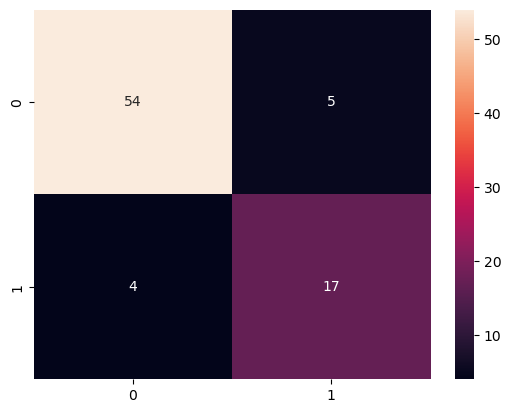

In [15]:
sns.heatmap(cm,annot= True, fmt='d', cmap='rocket')

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Classification Report
    </h3>
</div>

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.77      0.81      0.79        21

    accuracy                           0.89        80
   macro avg       0.85      0.86      0.86        80
weighted avg       0.89      0.89      0.89        80



<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Scores from Confusion Matrix
    </h3>
</div>

In [17]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


#false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.8875
Classification error : 0.1125
Precision : 0.9153
Recall or Sensitivity : 0.9310
True Positive Rate : 0.9310
False Positive Rate : 0.2273
Specificity : 0.7727


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC Curve
    </h3>
</div>

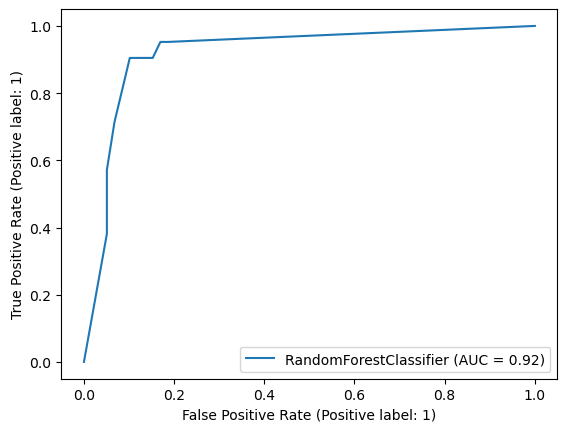

In [18]:
from sklearn import metrics
metrics.plot_roc_curve(model,X_test,y_test)
plt.show()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC AUC Score
    </h3>
</div>

In [19]:
# compute ROC AUC
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9201


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Cross Validation Score
    </h3>
</div>

In [20]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.875   0.875   0.90625 0.875   0.8125  0.9375  0.875   0.90625 0.875
 0.90625]


In [21]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8844


<div id='4'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> K Fold Cross Validation
    </h1>
</div>

In [22]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)

model=RandomForestClassifier()


linear_scores = cross_val_score(model, X, y, cv=kfold)
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:{}'.format(linear_scores))
# print average cross-validation score with linear kernel

print('\nAverage stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:[0.9125 0.875  0.8375 0.85   0.9625]

Average stratified cross-validation score with linear kernel:0.8875


<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #0E8388;">
    <h1 style = "padding: 30px; 
                 color: white;
                 font-weight:600;
                 font-size:50px;
                 text-align: CENTER;
                 font-family: Tilt Warp;">PLEASE UPVOTE IF IT HELPED
    </h1>
</div>](http://)